In [59]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [43]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 29.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 27.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 

In [45]:
!pip install tensorflow_decision_forests

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 15.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00a 0:00:01


In [47]:
!pip install ydf -U

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow_decision_forests as tfdf

2024-12-11 06:22:32.508155: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 06:22:32.519351: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 06:22:32.681520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 06:22:32.833133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733919752.955198    9845 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733919752.99

What are we trying to predict? For each session_id/question, we are trying to predict if a user will get a question right for that particular session

Very important:
There are 3 level groups. 0-4,5-12,13-22
Once a group of levels is finished certain questions will be asked. For example, after completing levels 0-4, you will be asked questions 1-3

Levels 0-4, question 1-3
Levels 5-12, question 4-13
Levels 13-22, question 14-18

There are a total of 18 questions
Based on previous information of the session, we need to guess if the user got the question right.




train dataset:
There were originally over 26 million rows but I lowered the amount of rows to 10 million as it was easier for my computer to handle.
We start with 20 columns but we will be getting rid of columns with way too many missing values as well as values I have deemed not important to the machine-learning algorithm

Removed columns:
    Due to missing values:
        'page', 'hover_duration', 'text', 'fqid', 'text_fqid'
    Due to my arbitrary reasoning (not being useful to the problem):
        'index', 'fullscreen', 'hq', 'music'

Remaining Columns:
    'session_id'- numerical(int64), 0 missing value ,the actual range of values not relevant
    'elasped_time'- numerical(int32), 0 missing values, range is 1988601973 in milliseconds
    'event_name'- categorical, 0 missing values
    'name'- categorical, 0 missing values
    'level'- numerical(uint8), 0 missing values, range is 22
    'room_coor_x'- numerical(float32), 788253 missing values, range is 3249.56787109375
    'room_coor_y'- numerical(float32), 788253 missing values, range is 1461.77880859375
    'screen_coor_x'- numerical(float32), 788253 missing values, range is 1919.0
    'screen_coor_y'- numerical(float32), 788253 missing values, range is 1919.0
    'room_fqid'- categorical, 0 missing values
    'level_group'- categorical, 0 missing values

Points to discuss:
    Class imbalances: Most categorical values have a significant imbalance between the categories

    Missing values: As you can see with the x and y coordinates, based on the game room and screen, the amount of missing values is the same for each column, upon looking at the data set we see a trend. Whenever one of these is missing, so are all the others. This gives us the option of either removing all the null values or replacing all of them with the knowledge that 4 out of 11 columns would be identical for just under 800,000 of 10,000,000 rows. We have enough data to get rid of these rows. We can compare imputing the missing data and getting rid of the values later on.

    Outliers: Upon a quick glance we can see their are some obvious outliers within multiple columns
        elapsed_time
        screen_coor_x
        screen_coor_y
    We will scale the numerical columns using z-score and get rid of any values with a magnitude greater than 3

Prior to the removal of outliers, the shape of our dataset is (10000000,11)




train_labels:
Gives the session_id along with the question that went along with it. Tells us if the questions were answered correctly
Not much change needs to be made to this dataset

There are no missing values in the dataset

For easier use I s the session_id into session and question
This will allow us to look at the specific question for each session Id

Columns:
    'session_id'- object
    'correct'- categorical, 1 or 0
    'session'- numerical, range not super relevant
    'q'- numerical, question number, range is 18

There is a class imbalance in the correct column (much more correct than incorrect)

No outliers

After splitting up the session_id column the shape is (424116, 4)


First we will look and understand the original training dataset. This is a classification, we will be using a random forest classification algorithm for this problem

In [3]:
# thie file was too big for me to load it all at once so I had to split it up into chunks then concat them together

# Even after this I was still having problems, but by using dtypes, it became easier to run
# Im going to make everything work first because I've already started, but when I run it again I need to make sure
# I randomize it because some of the columns are in order and may cause bias
dtypes={'elapsed_time':np.int32,
        'event_name':'category',
        'name':'category',
        'level':np.uint8,
        'room_coor_x':np.float32,
        'room_coor_y':np.float32,
        'screen_coor_x':np.float32,
        'screen_coor_y':np.float32,
        'hover_duration':np.float32,
        'text':'category',
        'fqid':'category',
        'room_fqid':'category',
        'text_fqid':'category',
        'fullscreen':'category',
        'hq':'category',
        'music':'category',
        'level_group':'category'}
#use=['session_id','elapsed_time','event_name','name','level','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y','room_fqid','fullscreen',
  #  'hq','music','level_group']
chunksize = 1000000  
chunks = pd.read_csv("train.csv", chunksize=chunksize,dtype=dtypes)

#will use to store chunks
df_list = []


for chunk in chunks:
    df_list.append(chunk)

#combining all of the chunks 
df = pd.concat(df_list, ignore_index=True)
# I kept having problems, therefore, since I have 26 million rows I am going to make the dataset smaller
# Randomly shuffle the rows
df_shuffled = df.sample(frac=1, random_state=42)  # frac=1 shuffles all rows

# Select the first 10000000 rows
df = df_shuffled.head(10000000)



# Print the shape of the sampled DataFrame
print(df.shape)


(10000000, 20)


In [4]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
24609355,22050515002013210,223,260482,navigate_click,undefined,4,NaN,-869.964600,-43.000000,44.0,373.0,NaN,NaN,toentry,tunic.kohlcenter.halloffame,NaN,0,0,1,0-4
1869913,20110208513597010,498,1535765,cutscene_click,basic,13,NaN,-130.537888,-115.368660,377.0,400.0,NaN,We'll need a key card.,seescratches,tunic.historicalsociety.basement,tunic.historicalsociety.basement.seescratches,1,0,1,13-22
856552,20100317311324640,23,81326,notification_click,basic,0,NaN,-395.484680,-254.883224,554.0,558.0,NaN,Gramps is a great historian!,NaN,tunic.historicalsociety.closet,tunic.historicalsociety.closet.retirement_lett...,0,0,1,0-4
19147512,21100119031562704,624,1626313,map_hover,basic,15,NaN,NaN,NaN,NaN,NaN,33.0,NaN,tunic.capitol_2,tunic.library.frontdesk,NaN,0,0,1,13-22
800451,20100313454174660,686,3690186,cutscene_click,basic,16,NaN,-944.905884,-186.149612,418.0,494.0,NaN,You can't just steal Jolie's pet.,confrontation,tunic.historicalsociety.cage,tunic.historicalsociety.cage.confrontation,1,0,1,13-22


In [5]:
df.isnull().sum()

session_id              0
index                   0
elapsed_time            0
event_name              0
name                    0
level                   0
page              9785963
room_coor_x        788253
room_coor_y        788253
screen_coor_x      788253
screen_coor_y      788253
hover_duration    9238690
text              6343028
fqid              3145520
room_fqid               0
text_fqid         6342989
fullscreen              0
hq                      0
music                   0
level_group             0
dtype: int64

In [6]:
drop_col=['index','page','hover_duration','text',
          'fqid','text_fqid','music','hq','fullscreen']
df = df.drop(columns=drop_col)


In [7]:
df.head()

,session_id,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,level_group
24609355,22050515002013210,260482,navigate_click,undefined,4,-869.964600,-43.000000,44.0,373.0,tunic.kohlcenter.halloffame,0-4
1869913,20110208513597010,1535765,cutscene_click,basic,13,-130.537888,-115.368660,377.0,400.0,tunic.historicalsociety.basement,13-22
856552,20100317311324640,81326,notification_click,basic,0,-395.484680,-254.883224,554.0,558.0,tunic.historicalsociety.closet,0-4
19147512,21100119031562704,1626313,map_hover,basic,15,NaN,NaN,NaN,NaN,tunic.library.frontdesk,13-22
800451,20100313454174660,3690186,cutscene_click,basic,16,-944.905884,-186.149612,418.0,494.0,tunic.historicalsociety.cage,13-22


In [8]:
df.shape

(10000000, 11)

In [9]:
# Having x and y coordinates allows for some mathmatical concepts to be computed
numerical=['elapsed_time','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y']

In [10]:
df[numerical].describe()

,elapsed_time,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y
count,1.000000e+07,9.211747e+06,9.211747e+06,9.211747e+06,9.211747e+06
mean,4.002322e+06,-5.490759e+01,-1.162202e+02,4.584365e+02,3.856186e+02
std,3.105847e+07,5.202964e+02,2.184676e+02,2.478973e+02,1.298465e+02
min,0.000000e+00,-1.991220e+03,-9.181624e+02,0.000000e+00,0.000000e+00
25%,4.391730e+05,-3.527992e+02,-2.127457e+02,2.690000e+02,3.040000e+02
50%,1.014536e+06,-1.115665e+01,-9.757702e+01,4.470000e+02,3.970000e+02
75%,1.746465e+06,2.966202e+02,2.270195e+01,6.630000e+02,4.710000e+02
max,1.988602e+09,1.258348e+03,5.436164e+02,1.919000e+03,1.440000e+03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000000 entries, 24609355 to 13365862
Data columns (total 11 columns):
 #   Column         Dtype   
---  ------         -----   
 0   session_id     int64   
 1   elapsed_time   int32   
 2   event_name     category
 3   name           category
 4   level          uint8   
 5   room_coor_x    float32 
 6   room_coor_y    float32 
 7   screen_coor_x  float32 
 8   screen_coor_y  float32 
 9   room_fqid      category
 10  level_group    category
dtypes: category(4), float32(4), int32(1), int64(1), uint8(1)
memory usage: 391.0 MB


In [12]:
numerical=['elapsed_time','level','room_coor_x','room_coor_y','screen_coor_x','screen_coor_x',]
for _ in df[numerical]:
    c_range= df[_].max()-df[_].min()
    print(f"'{_}' range is: {c_range}")

'elapsed_time' range is: 1988601973
'level' range is: 22
'room_coor_x' range is: 3249.56787109375
'room_coor_y' range is: 1461.77880859375
'screen_coor_x' range is: 1919.0
'screen_coor_x' range is: 1919.0


In [13]:
# If we are going to be encoding, we will need to find all of the categories of the categorical columns
df['event_name'].unique()


['navigate_click', 'cutscene_click', 'notification_click', 'map_hover', 'person_click', ..., 'object_hover', 'map_click', 'notebook_click', 'observation_click', 'checkpoint']
Length: 11
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [14]:
df['event_name'].value_counts()

event_name
navigate_click        4307557
person_click          2301745
cutscene_click        1027300
object_click           836098
object_hover           401821
map_hover              359489
notification_click     246669
notebook_click         214037
map_click              197044
observation_click       81297
checkpoint              26943
Name: count, dtype: int64

In [15]:
df['name'].unique()

['undefined', 'basic', 'close', 'open', 'next', 'prev']
Categories (6, object): ['basic', 'close', 'next', 'open', 'prev', 'undefined']

In [16]:
df['name'].value_counts()

name
undefined    4832356
basic        4809566
close         257329
open           89170
prev            7219
next            4360
Name: count, dtype: int64

In [17]:
df['level'].unique()

array([ 4, 13,  0, 15, 16, 11, 21,  3, 18,  6,  7, 17,  5, 19, 14, 10,  2,
        8,  1,  9, 20, 12, 22], dtype=uint8)

In [18]:
df['level'].value_counts()

level
18    1329954
6      804659
21     801466
11     736257
16     492390
7      486099
15     464025
19     463486
17     459321
3      435593
9      432670
20     429508
2      377379
8      338548
13     312821
1      276822
0      262779
5      254331
14     209026
10     170819
4      162958
22     159554
12     139535
Name: count, dtype: int64

In [19]:
df['room_fqid'].unique()

['tunic.kohlcenter.halloffame', 'tunic.historicalsociety.basement', 'tunic.historicalsociety.closet', 'tunic.library.frontdesk', 'tunic.historicalsociety.cage', ..., 'tunic.historicalsociety.collection', 'tunic.capitol_1.hall', 'tunic.drycleaner.frontdesk', 'tunic.capitol_2.hall', 'tunic.flaghouse.entry']
Length: 19
Categories (19, object): ['tunic.capitol_0.hall', 'tunic.capitol_1.hall', 'tunic.capitol_2.hall', 'tunic.drycleaner.frontdesk', ..., 'tunic.kohlcenter.halloffame', 'tunic.library.frontdesk', 'tunic.library.microfiche', 'tunic.wildlife.center']

In [20]:
df['room_fqid'].value_counts()

room_fqid
tunic.historicalsociety.entry              1377891
tunic.wildlife.center                      1145190
tunic.historicalsociety.cage                893933
tunic.library.frontdesk                     816927
tunic.historicalsociety.frontdesk           739314
tunic.historicalsociety.stacks              681870
tunic.historicalsociety.closet_dirty        595933
tunic.humanecology.frontdesk                504769
tunic.historicalsociety.basement            443686
tunic.kohlcenter.halloffame                 417815
tunic.library.microfiche                    378359
tunic.drycleaner.frontdesk                  373154
tunic.historicalsociety.collection          363925
tunic.historicalsociety.closet              326807
tunic.flaghouse.entry                       317687
tunic.historicalsociety.collection_flag     171829
tunic.capitol_1.hall                        168768
tunic.capitol_0.hall                        158603
tunic.capitol_2.hall                        123540
Name: count, dtype: i

In [21]:
df['level_group'].unique()

['0-4', '13-22', '5-12']
Categories (3, object): ['0-4', '13-22', '5-12']

In [22]:
df['level_group'].value_counts()

level_group
13-22    5121551
5-12     3362918
0-4      1515531
Name: count, dtype: int64

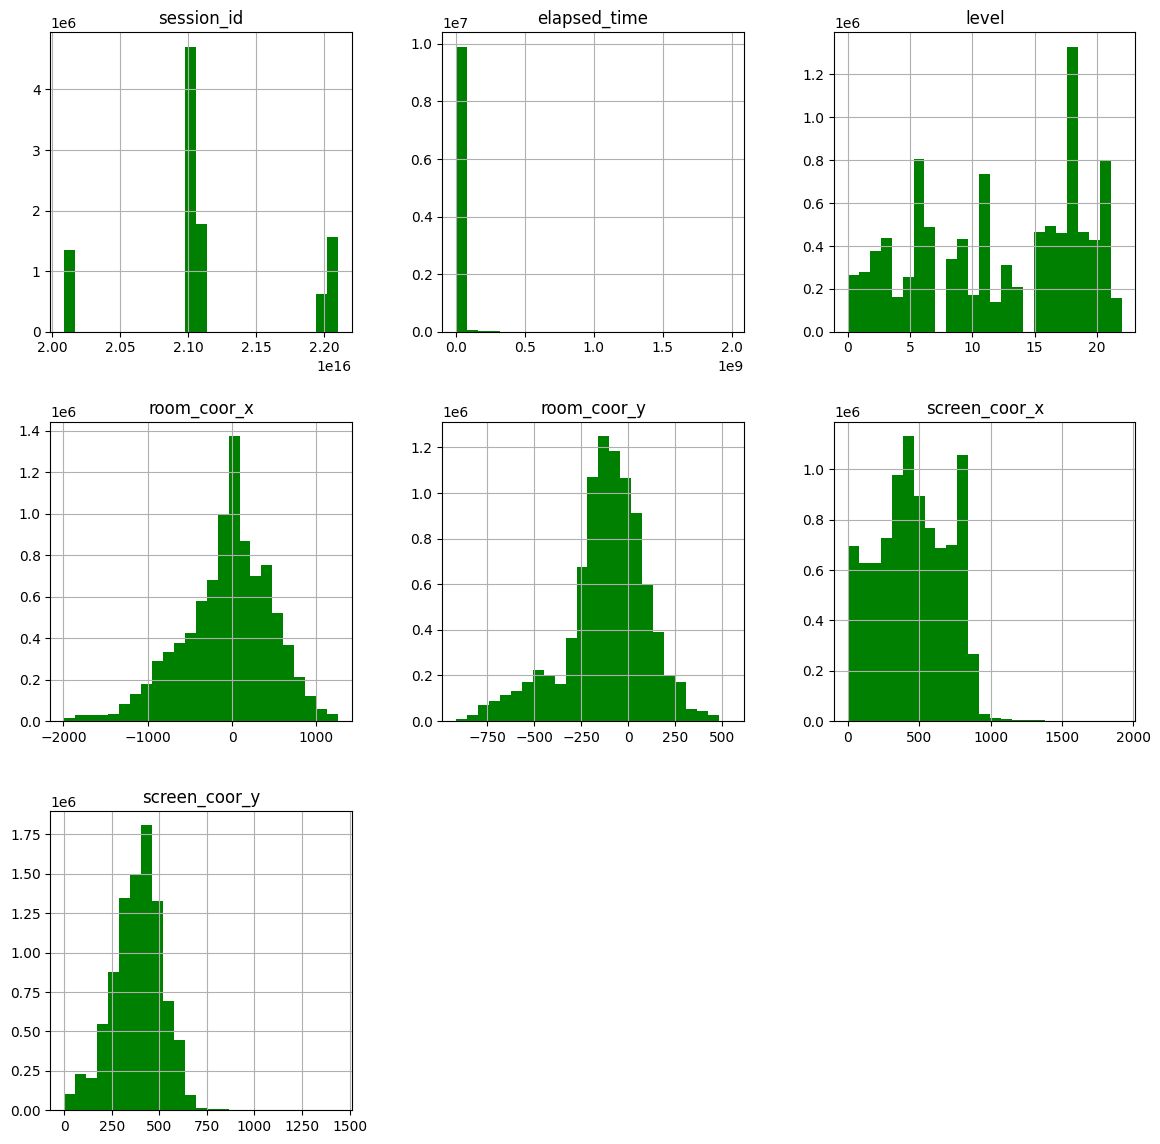

In [23]:
df.hist(bins =25 , figsize= (14,14), color="green")
plt.show()

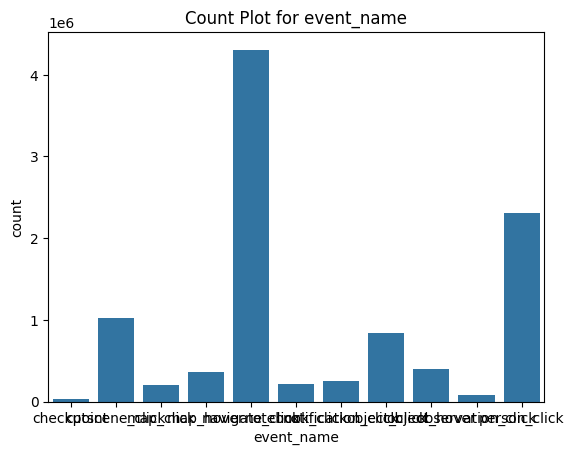

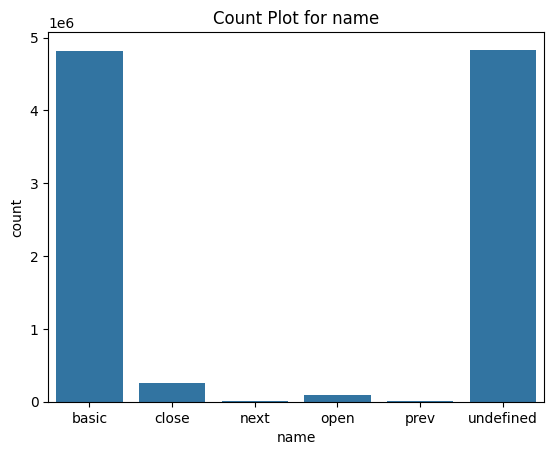

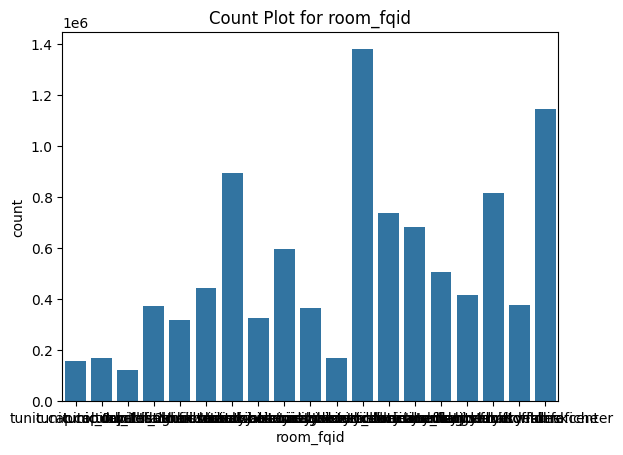

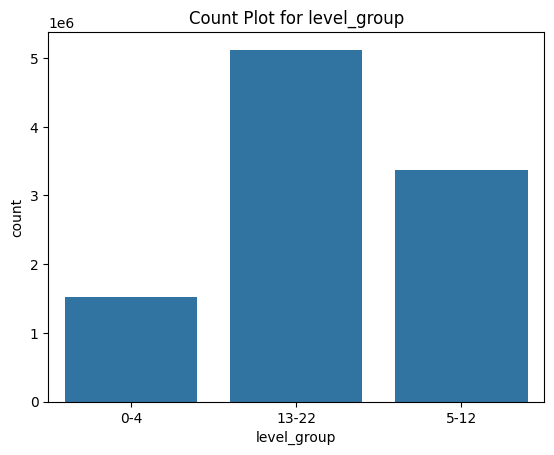

In [24]:
categories = ['event_name', 'name', 'room_fqid', 'level_group']

for category in categories:
    sns.countplot(x=category, data=df)
    plt.title(f"Count Plot for {category}")
    plt.show()

Start looking at the train_labels dataset that is used to determine whether a question was answered correctly

In [25]:
labels = pd.read_csv("train_labels.csv")

In [26]:
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )


In [27]:
labels.head()

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [28]:
labels.isnull().sum()

session_id    0
correct       0
session       0
q             0
dtype: int64

In [29]:
labels.shape

(424116, 4)

In [30]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  424116 non-null  object
 1   correct     424116 non-null  int64 
 2   session     424116 non-null  int64 
 3   q           424116 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.9+ MB


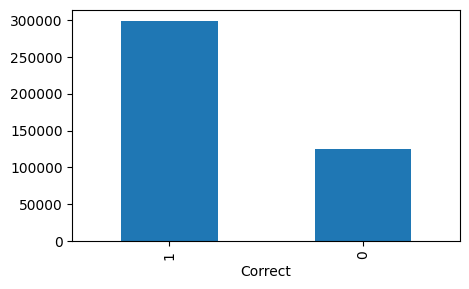

In [31]:
plt.figure(figsize=(5, 3))
plot_df = labels.correct.value_counts()
plot_df.plot(kind="bar")
plt.xlabel('Correct')
plt.show()

In [32]:
plot_df

correct
1    299271
0    124845
Name: count, dtype: int64

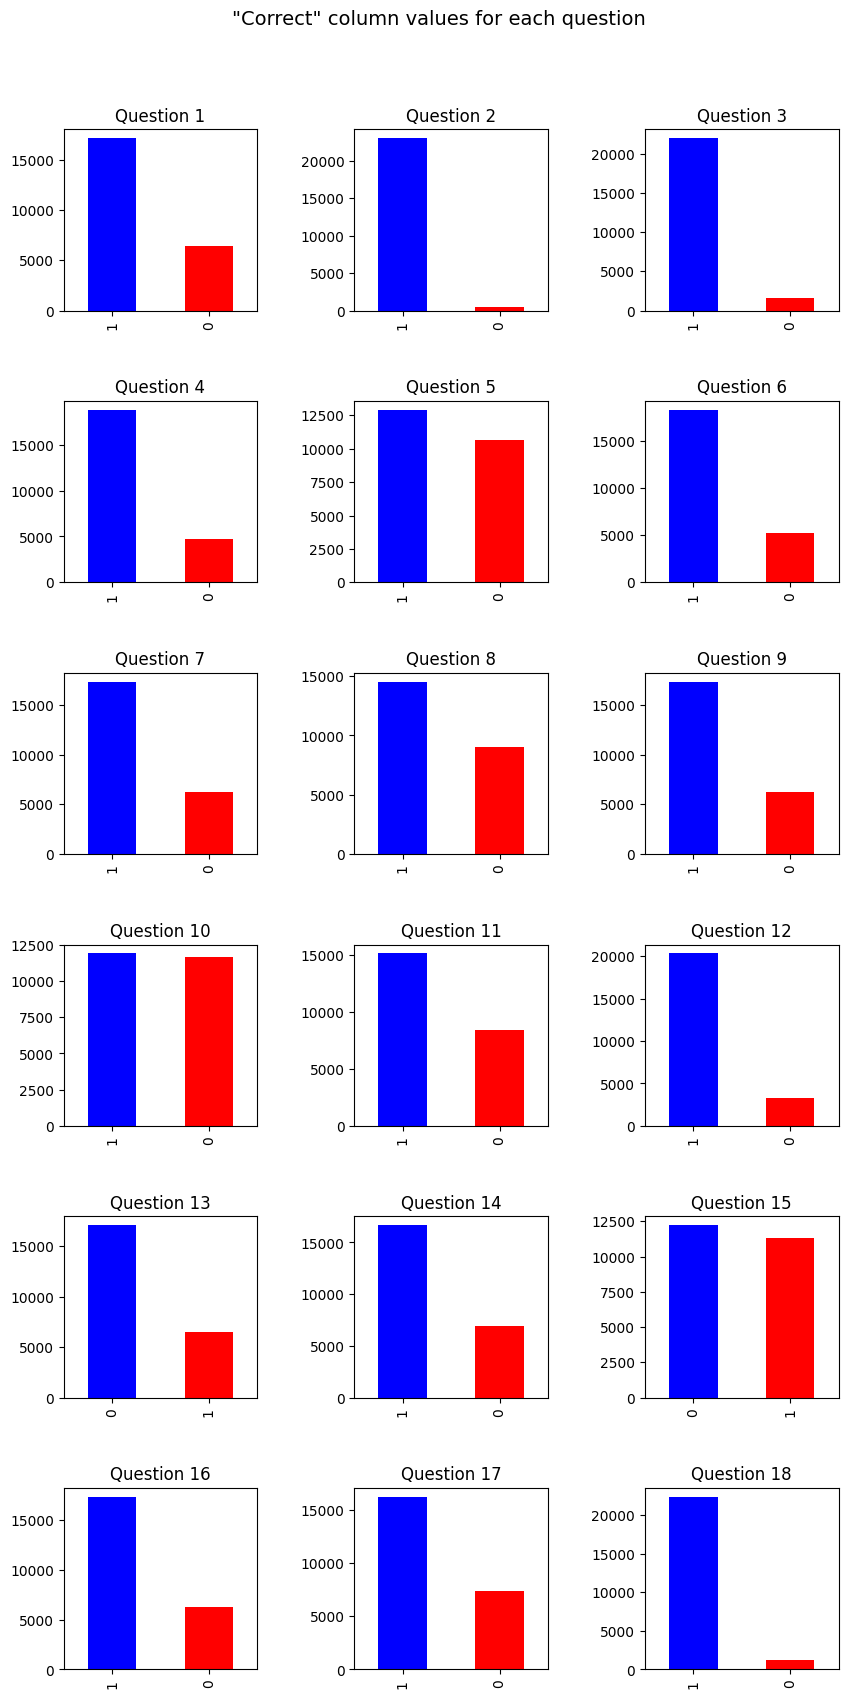

In [33]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)
for n in range(1,19):
    ax = plt.subplot(6, 3, n)

    # filter df and plot ticker on the new subplot axis
    plot_df = labels.loc[labels.q == n]
    plot_df = plot_df.correct.value_counts()
    plot_df.plot(ax=ax, kind="bar", color=['b', 'r'])
    
    # chart formatting
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")

In [45]:
df=df.dropna()

In [46]:
df.isnull().sum()

level_group            0
event_name_nunique     0
name_nunique           0
room_fqid_nunique      0
level_group_nunique    0
elapsed_time           0
level                  0
room_coor_x            0
room_coor_y            0
screen_coor_x          0
screen_coor_x          0
elapsed_time_std       0
level_std              0
room_coor_x_std        0
room_coor_y_std        0
screen_coor_x_std      0
screen_coor_x_std      0
dtype: int64

In [50]:
#Use zscore to find and get rid of outliers
# revizualize data 
#Standardizing new dataframe
from scipy import stats
for col in numerical:
    df[col] = stats.zscore(df[col])
df.head()

,level_group,event_name_nunique,name_nunique,room_fqid_nunique,level_group_nunique,elapsed_time,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_x,elapsed_time_std,level_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_x_std
session_id,,,,,,,,,,,,,,,,,
20090312431273200,0-4,7,3,7,1,-0.119103,-1.108580,NaN,NaN,NaN,NaN,0.001644,0.197109,-1.0,-1.0,-1.0,-1.0
20090312431273200,13-22,8,2,11,1,-0.077316,1.250489,NaN,NaN,NaN,NaN,0.003904,0.340763,-1.0,-1.0,-1.0,-1.0
20090312431273200,5-12,8,3,10,1,-0.107547,-0.199457,NaN,NaN,NaN,NaN,0.002604,0.321127,-1.0,-1.0,-1.0,-1.0
20090312433251036,0-4,9,3,6,1,-0.118626,-1.131121,NaN,NaN,NaN,NaN,0.002221,0.190368,-1.0,-1.0,-1.0,-1.0
20090312433251036,13-22,11,5,16,1,-0.014547,1.289416,NaN,NaN,NaN,NaN,0.024882,0.279891,-1.0,-1.0,-1.0,-1.0


In [49]:
df.shape

(70686, 17)

In [ ]:
df.hist(bins =25 , figsize= (14,14), color="blue")
plt.show()

In [37]:
def feature_engineer(dataset_df):
    dfs = []
    for n in numerical:
        tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('mean')
        dfs.append(tmp)
    for n in numerical:
        tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    dataset_df = pd.concat(dfs,axis=1)
    dataset_df = dataset_df.fillna(-1)
    dataset_df = dataset_df.reset_index()
    dataset_df = dataset_df.set_index('session_id')
    return dataset_df

In [38]:
df = feature_engineer(df)
print("Full prepared dataset shape is {}".format(df.shape))

/tmp/ipykernel_9845/2564974063.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('nunique')
/tmp/ipykernel_9845/2564974063.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('mean')
/tmp/ipykernel_9845/2564974063.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['sess

Full prepared dataset shape is (70686, 17)


In [39]:
df.head()

,level_group,event_name_nunique,name_nunique,room_fqid_nunique,level_group_nunique,elapsed_time,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_x,elapsed_time_std,level_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_x_std
session_id,,,,,,,,,,,,,,,,,
20090312431273200,0-4,7,3,7,1,-0.125906,-1.555974,-1.0,-1.0,-1.0,-1.0,0.001644,0.197109,-1.0,-1.0,-1.0,-1.0
20090312431273200,13-22,8,2,11,1,-0.095245,0.812738,-1.0,-1.0,-1.0,-1.0,0.003904,0.340763,-1.0,-1.0,-1.0,-1.0
20090312431273200,5-12,8,3,10,1,-0.117427,-0.643135,-1.0,-1.0,-1.0,-1.0,0.002604,0.321127,-1.0,-1.0,-1.0,-1.0
20090312433251036,0-4,9,3,6,1,-0.125556,-1.578608,-1.0,-1.0,-1.0,-1.0,0.002221,0.190368,-1.0,-1.0,-1.0,-1.0
20090312433251036,13-22,11,5,16,1,-0.049190,0.851825,-1.0,-1.0,-1.0,-1.0,0.024882,0.279891,-1.0,-1.0,-1.0,-1.0


In [40]:
df.describe()

,event_name_nunique,name_nunique,room_fqid_nunique,level_group_nunique,elapsed_time,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_x,elapsed_time_std,level_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_x_std
count,70686.000000,70686.000000,70686.000000,70686.0,70686.000000,70686.000000,70686.0,70686.0,70686.0,70686.0,70686.000000,70686.000000,70686.0,70686.0,70686.0,70686.0
mean,9.138868,3.568415,9.785460,1.0,-0.038516,-0.442862,-1.0,-1.0,-1.0,-1.0,0.029959,0.294688,-1.0,-1.0,-1.0,-1.0
std,1.284967,0.737161,3.135197,0.0,0.733742,1.004095,0.0,0.0,0.0,0.0,0.388360,0.076453,0.0,0.0,0.0,0.0
min,4.000000,2.000000,3.000000,1.0,-0.128850,-1.733291,-1.0,-1.0,-1.0,-1.0,0.000007,0.097636,-1.0,-1.0,-1.0,-1.0
25%,8.000000,3.000000,6.000000,1.0,-0.123569,-1.554430,-1.0,-1.0,-1.0,-1.0,0.002644,0.202384,-1.0,-1.0,-1.0,-1.0
50%,9.000000,4.000000,11.000000,1.0,-0.109917,-0.621714,-1.0,-1.0,-1.0,-1.0,0.004630,0.322808,-1.0,-1.0,-1.0,-1.0
75%,10.000000,4.000000,12.000000,1.0,-0.085376,0.826375,-1.0,-1.0,-1.0,-1.0,0.007201,0.354896,-1.0,-1.0,-1.0,-1.0
max,11.000000,6.000000,17.000000,1.0,38.232599,1.236432,-1.0,-1.0,-1.0,-1.0,31.797221,0.564653,-1.0,-1.0,-1.0,-1.0


In [41]:
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - 0.20))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

56547 examples in training, 14139 examples in testing.


In [42]:
rf = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.


2024-12-11 06:24:57.504736: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Use /tmp/tmp80ckeyim as temporary training directory


2024-12-11 06:24:57.966448: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2024-12-11 06:24:57.966500: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1850] "goss_beta" set but "sampling_method" not equal to "GOSS".
2024-12-11 06:24:57.966528: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1864] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [43]:
VALID_USER_LIST = valid_x.index.unique()

prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Create an empty dictionary to store the models created for each question.
models = {}

# Create an empty dictionary to store the evaluation score for each question.
evaluation_dict ={}

In [44]:
for q_no in range(1,19):

    # Select level group for the question based on the q_no.
    if q_no<=3: grp = '0-4'
    elif q_no<=13: grp = '5-12'
    elif q_no<=22: grp = '13-22'
    print("### q_no", q_no, "grp", grp)
    
        
    # Filter the rows in the datasets based on the selected level group. 
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Select the labels for the related q_no.
    train_labels = labels.loc[labels.q==q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q==q_no].set_index('session').loc[valid_users]

    # Add the label to the filtered datasets.
    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df.loc[:, train_df.columns != 'level_group'], label="correct")
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df.loc[:, valid_df.columns != 'level_group'], label="correct")

    # We will now create the Gradient Boosted Trees Model with default settings. 
    # By default the model is set to train for a classification task.
    gbtm = tfdf.keras.GradientBoostedTreesModel(verbose=0)
    gbtm.compile(metrics=["accuracy"])

    # Train the model.
    gbtm.fit(x=train_ds)

    # Store the model
    models[f'{grp}_{q_no}'] = gbtm

    # Evaluate the trained model on the validation dataset and store the 
    # evaluation accuracy in the `evaluation_dict`.
    inspector = gbtm.make_inspector()
    inspector.evaluation()
    evaluation = gbtm.evaluate(x=valid_ds,return_dict=True)
    evaluation_dict[q_no] = evaluation["accuracy"]         

    # Use the trained model to make predictions on the validation dataset and 
    # store the predicted values in the `prediction_df` dataframe.
    predict = gbtm.predict(x=valid_ds)
    prediction_df.loc[valid_users, q_no-1] = predict.flatten() 

### q_no 1 grp 0-4


/tmp/ipykernel_9845/1221147862.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
/tmp/ipykernel_9845/1221147862.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
for name, value in evaluation_dict.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(evaluation_dict.values())/18)